# Traffic light and Sign Object detection 

In [1]:
#write name team with tabulate
from tabulate import tabulate

member_name = [

    ["BUN RATNATEPY", "Female", "I4-AMS-A", "e20210320"],
    ["CHAN SOPHARA", "Male", "I4-AMS-A", "e20211081"],
    ["CHHRAN MOSES", "Male", "I4-AMS-A", "e20210294"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 8- I4 -Artificial intelligence -TP-A:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 8- I4 -Artificial intelligence -TP-A:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ BUN RATNATEPY │ Female   │ I4-AMS-A  │ e20210320 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHAN SOPHARA  │ Male     │ I4-AMS-A  │ e20211081 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHHRAN MOSES  │ Male     │ I4-AMS-A  │ e20210294 │
╘═══════════════╧══════════╧═══════════╧═══════════╛


# Setup and Imports

In [2]:
# Import libraries
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Ensure you have the ultralytics package installed for YOLOv8


# Paths and Directories

In [3]:
# Paths and directories
image_dir = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\db_lisa_tiny"
csv_file = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\annotations.csv"
data_copy_dir = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\data_copy"  # New directory for copied data (outside the main folder)


In [4]:
# Create new directory structure
os.makedirs(os.path.join(data_copy_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(data_copy_dir, "test"), exist_ok=True)

# Load and Preprocess Annotations

In [5]:
#Load and preprocess annotations
data = pd.read_csv(csv_file)
data["filename"] = data["filename"].apply(lambda x: os.path.join(image_dir, x))
data["class"] = data["class"].astype('category').cat.codes


In [6]:
# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Copy Data to New Directories

In [7]:
# Copy Data to New Directories
for subset, subset_data in zip(["train", "test"], [train_data, test_data]):
    for _, row in subset_data.iterrows():
        src = row['filename']
        dst = os.path.join(data_copy_dir, subset, os.path.basename(row['filename']))
        shutil.copy(src, dst)

# Parameters

In [8]:
# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Utility Functions

In [9]:
# Function to check image sizes
def check_image_sizes(image_dir):
    print("Checking image sizes...")
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                image = cv2.imread(file_path)
                if image is None:
                    print(f"Error reading image: {file_path}")
                else:
                    h, w, _ = image.shape
                    print(f"{file}: {w}x{h}")



In [10]:
# Display the first 5 images with matplotlib
def display_first_images(image_dir, num_images=5):
    print("Displaying first 5 images...")
    images = []
    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                images.append(file_path)
                if len(images) == num_images:
                    break
        if len(images) == num_images:
            break

    if images:
        plt.figure(figsize=(15, 5))
        for i, img_path in enumerate(images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.axis('off')
        plt.show()
    else:
        print("No images found to display.")

In [11]:
# Function to rotate images for data augmentation
def rotate_image(image_path, angle):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return None
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)

    # Rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated


# Example Usage of Rotation

In [12]:
# Check image sizes in the train folder
check_image_sizes(os.path.join(data_copy_dir, "train"))

Checking image sizes...
sample_001.png: 704x480
sample_002.png: 704x480
sample_003.png: 704x480
sample_004.png: 640x480
sample_005.png: 640x480
sample_007.png: 704x480
sample_008.png: 704x480
sample_009.png: 704x480
sample_010.png: 640x480
sample_011.png: 704x480
sample_012.png: 704x480
sample_013.png: 704x480
sample_014.png: 704x480
sample_015.png: 704x480
sample_016.png: 704x480
sample_017.png: 704x480
sample_018.png: 640x480
sample_019.png: 704x480
sample_020.png: 704x480
sample_021.png: 704x480
sample_022.png: 640x480
sample_023.png: 704x480
sample_025.png: 704x480
sample_027.png: 704x480
sample_028.png: 704x480
sample_029.png: 704x480
sample_030.png: 704x480
sample_033.png: 704x480
sample_035.png: 704x480
sample_036.png: 704x480
sample_037.png: 704x480
sample_038.png: 704x480
sample_039.png: 704x480
sample_041.png: 640x480
sample_042.png: 640x480
sample_043.png: 704x480
sample_044.png: 640x480
sample_046.png: 704x480
sample_047.png: 704x480
sample_048.png: 704x480
sample_049.png: 

Displaying first 5 images...


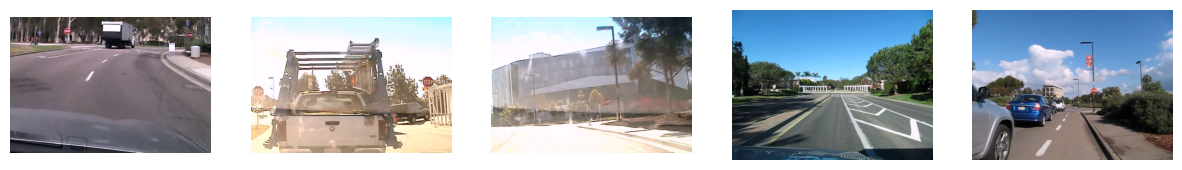

In [13]:
# Display the first 5 images from the train folder
display_first_images(os.path.join(data_copy_dir, "train"))


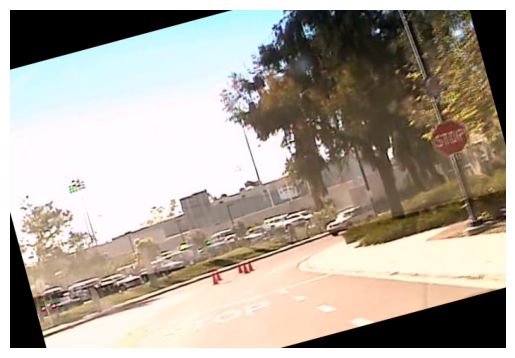

In [14]:
# Rotate and display a sample image from the train dataset
sample_image_path = train_data.iloc[0]['filename']
rotated_image = rotate_image(sample_image_path, 15)  # Rotate by 15 degrees
if rotated_image is not None:
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Data Generators

In [15]:
# Preprocessing function
def preprocess_image(image_path, bbox, label):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x1, y1, x2, y2 = bbox
    cropped_image = image[y1:y2, x1:x2]
    resized_image = cv2.resize(cropped_image, IMG_SIZE)
    return resized_image, label

In [16]:
# Generator
def data_generator(data, batch_size):
    while True:
        for start in range(0, len(data), batch_size):
            end = min(start + batch_size, len(data))
            batch = data[start:end]
            images, labels = [], []
            for _, row in batch.iterrows():
                image, label = preprocess_image(
                    row['filename'],
                    (row['x1'], row['y1'], row['x2'], row['y2']),
                    row['class']
                )
                images.append(image)
                labels.append(label)
            yield np.array(images), np.array(labels)

train_gen = data_generator(train_data, BATCH_SIZE)
test_gen = data_generator(test_data, BATCH_SIZE)

# Model Selection and Training

In [17]:
# Model Selection and Training
base_model = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(data['class'].unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = len(train_data) // BATCH_SIZE
validation_steps = len(test_data) // BATCH_SIZE

model.fit(train_gen,
          steps_per_epoch=steps_per_epoch,
          validation_data=test_gen,
          validation_steps=validation_steps,
          epochs=10)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 829ms/step - accuracy: 0.4697 - loss: 1.5786 - val_accuracy: 0.7500 - val_loss: 0.7119
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 711ms/step - accuracy: 0.8501 - loss: 0.5316 - val_accuracy: 0.8243 - val_loss: 0.4484
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 705ms/step - accuracy: 0.8642 - loss: 0.4011 - val_accuracy: 0.8716 - val_loss: 0.3378
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 706ms/step - accuracy: 0.8850 - loss: 0.3452 - val_accuracy: 0.8919 - val_loss: 0.3293
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 698ms/step - accuracy: 0.9175 - loss: 0.2624 - val_accuracy: 0.9122 - val_loss: 0.2912
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 695ms/step - accuracy: 0.9298 - loss: 0.2425 - val_accuracy: 0.9054 - val_loss: 0.2703
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 16s 712ms/step - accuracy: 0.9398 - loss: 0.1997 - val_accuracy: 0.9000 - val_loss: 0.2527
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 703ms/step - accuracy: 0.9237 - loss: 0.2024 - val_accu

# Save the Model

In [18]:
# Save the Model
model.save('traffic_sign_detection_model.h5')

# Example Testing

Processing: C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\db_lisa_tiny\sample_636.png

0: 448x640 1 person, 3 traffic lights, 164.0ms
Speed: 9.0ms preprocess, 164.0ms inference, 12.2ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


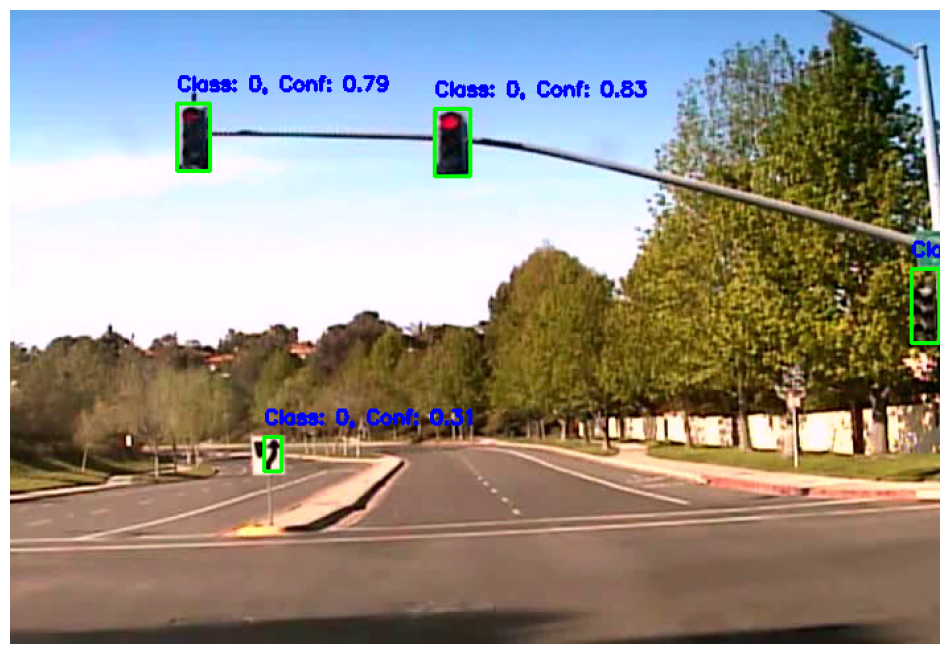

Processing: C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\data_copy\test\sample_071.png

0: 480x640 1 stop sign, 102.0ms
Speed: 1.0ms preprocess, 102.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


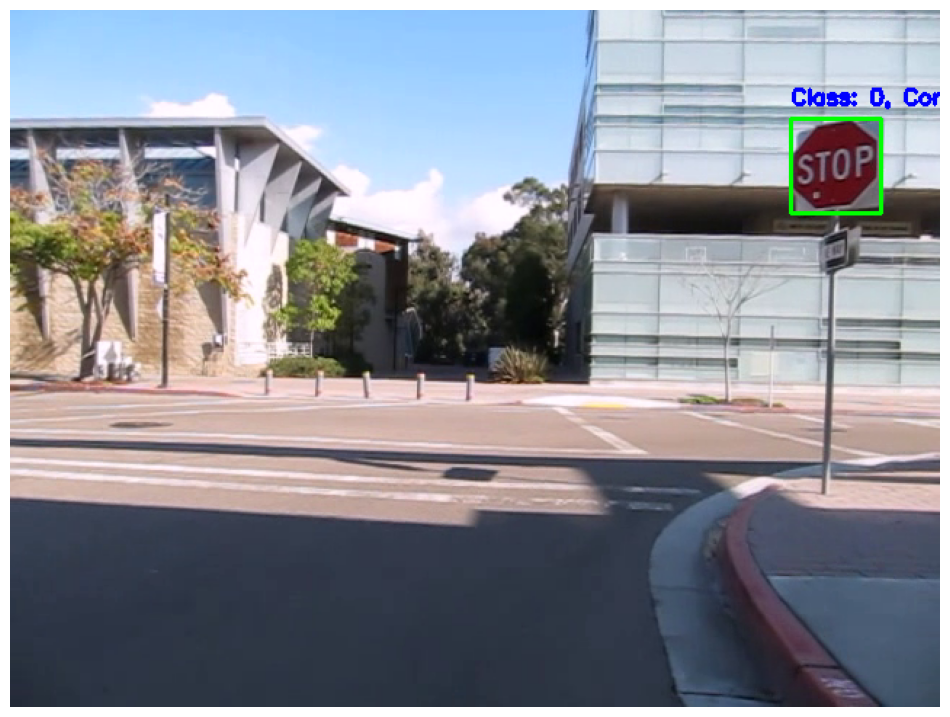

Processing: C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\data_copy\train\sample_033.png

0: 448x640 2 stop signs, 146.3ms
Speed: 1.9ms preprocess, 146.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


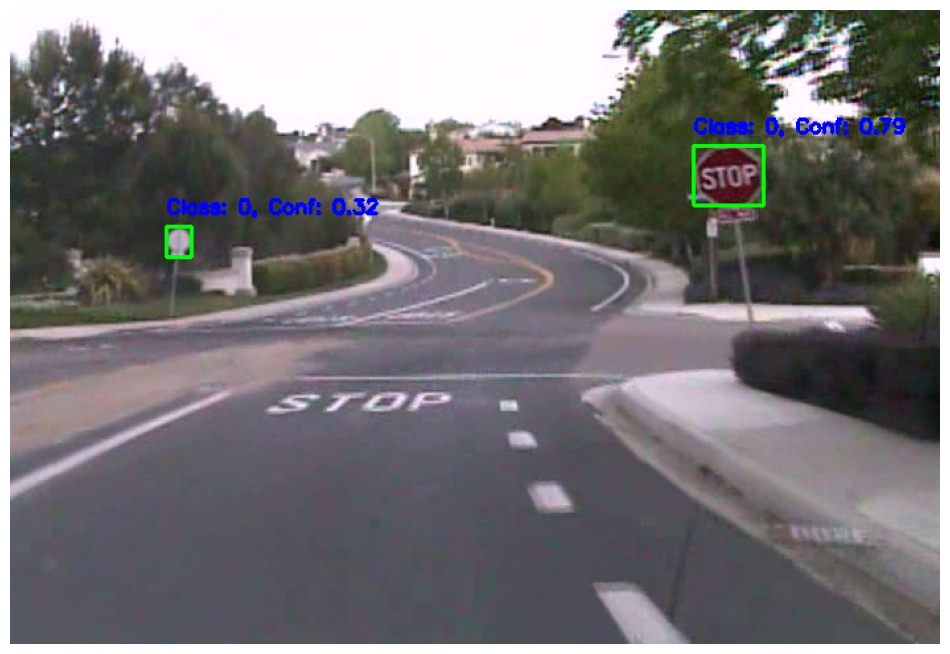

In [19]:
# Testing with multiple images
from ultralytics import YOLO
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the YOLO detector with a traffic-specific model
detector = YOLO('yolov8n.pt')  # Replace with your specific YOLO weights for traffic lights & signs

# Load the classification model
model = load_model("traffic_sign_detection_model.h5")  # EfficientNetB0 model

# Define image size for classification model
IMG_SIZE = (224, 224)

def detect_and_classify(image_path, model, detector):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return
    original_image = image.copy()
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform detection using the modified YOLO (focusing on traffic signs and traffic lights)
    results = detector(image_rgb)

    # Process detections
    for box in results[0].boxes:  # Access YOLO detection boxes
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class index

        # Draw the bounding box
        cv2.rectangle(original_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Crop the detected region
        cropped_image = image_rgb[y1:y2, x1:x2]
        if cropped_image.size == 0:  # Skip invalid detections
            continue

        # Preprocess the cropped image for classification
        resized_image = cv2.resize(cropped_image, IMG_SIZE)
        resized_image = resized_image / 255.0  # Normalize
        resized_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension

        # Classify the cropped region
        pred = model.predict(resized_image)
        predicted_label = np.argmax(pred)

        # Annotate the image with the classification result
        label_text = f"Class: {predicted_label}, Conf: {conf:.2f}"
        cv2.putText(original_image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with annotations
    plt.figure(figsize=(12, 12))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Paths to test images
test_image_paths = [
    r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\db_lisa_tiny\sample_636.png",
    r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\data_copy\test\sample_071.png",
    r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\data_copy\train\sample_033.png"
]

# Test the function on multiple images
for image_path in test_image_paths:
    print(f"Processing: {image_path}")
    detect_and_classify(image_path, model, detector)


# Video demonstrastion 

In [20]:
# Testing on Video (demo)
from ultralytics import YOLO
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize the YOLO detector with a traffic-specific model (only focusing on traffic lights and traffic signs)
detector = YOLO('yolov8n.pt')  # Load YOLOv8 nano or small model

# Load the classification model
model = load_model("traffic_sign_detection_model.h5")  # EfficientNetB0 model

# Define image size for classification model
IMG_SIZE = (224, 224)

def detect_and_classify_video(video_path, model, detector, output_path="Redlight_new_demo.mp4"):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video {video_path}")
        return

    # Video writer setup
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        original_frame = frame.copy()
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform detection using the YOLOv8 model focusing only on traffic lights and signs
        results = detector(frame_rgb)

        for box in results[0].boxes:
            # Check if the detected object is a traffic light or traffic sign
            class_names = results[0].names
            label = class_names[int(box.cls[0])]
            
            if label in ['traffic light', 'traffic sign']:
                # Extract bounding box coordinates
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0]

                # Draw detection bounding box
                cv2.rectangle(original_frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

                # Crop and preprocess the detected region for classification
                cropped_image = frame_rgb[y1:y2, x1:x2]
                if cropped_image.size == 0:  # Skip invalid crops
                    continue
                resized_image = cv2.resize(cropped_image, IMG_SIZE)
                resized_image = resized_image / 255.0  # Normalize
                resized_image = np.expand_dims(resized_image, axis=0)  # Add batch dimension

                # Classify the cropped region using EfficientNetB0 model
                pred = model.predict(resized_image)
                predicted_label = np.argmax(pred)

                # Annotate the frame with the classification result
                label_text = f"Class: {predicted_label}, Conf: {conf:.2f}"
                cv2.putText(original_frame, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Write processed frame to the output video
        out.write(original_frame)

        # Display the frame (optional)
        cv2.imshow("Processed Video", original_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Processed video saved to {output_path}")

# Path to the test video
detection_video_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project_AI_Object\Tiny LISA Traffic Sign Dection\Red light.mp4"

# Call the function to process the video
detect_and_classify_video(detection_video_path, model, detector)



0: 640x384 1 car, 2 traffic lights, 94.6ms
Speed: 2.0ms preprocess, 94.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

0: 640x384 1 car, 3 traffic lights, 98.9ms
Speed: 6.0ms preprocess, 98.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

0: 640x384 1 car, 3 traffic lights, 82.3ms
Speed: 2.0ms preprocess, 82.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step

0: 640x384 1 car, 3 traffic lights, 87.2ms
Speed: 2.0ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

0: 640x384 1 car, 2